# **Introduction to Image Processing in Python**

**Image processing** is divided into analogue image processing and digital image processing.

**Digital image processing** is the use of computer algorithms to perform image processing on digital images. It allows a much wider range of algorithms to be applied to the input data - the aim of digital image processing is to improve the image data (features) by suppressing unwanted distortions and/or enhancement of some important image features so that our AI models can benefit from this improved data to work on.

# **Mount Google Drive**

In [1]:
# MOUNT TO GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/gdrive')
root_path = "gdrive/My Drive/Textile_Project/"

Mounted at /content/gdrive


## **Importing the Required Libraries**
This section loads some required libraries used in this notebook: numpy, pandas, cv2, tensorflow, PIL, matplotlib
* [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

In [2]:
# Important Dependancies


import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import cv2

import tensorflow as tf

from PIL import Image

## **Preprocessing the images:**
* Read Image
* Resize Image 
* Rotate Image
* Filp Image
* RGB Image
* Trim Image






In [3]:
# Open Images

import glob
import os
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

#CATEGORIES

CATEGORIES = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/"
data = np.array(folder_path)

label = np.array(CATEGORIES)
#print(data.shape, label.shape)
print('CATEGORIES : ', label.shape)



print ('')
print ('#################################################################')
print ('')

folder_list = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/{}/".format(folder_list[5])
images_list = os.listdir(folder_path)
print(images_list)

for f in os.listdir("."):
    if f.endswith(".jpg"):
        print(f)



CATEGORIES :  (6,)

#################################################################

['img_1.jpg', 'img_2.jpg', 'img_3.jpg', 'img_4.jpg', 'img_5.jpg', 'img_6.jpg', 'img_7.jpg', 'img_8.jpg', 'img_9.jpg', 'img_10.jpg', 'img_11.jpg', 'img_12.jpg']


# **Opening an Image**
To open an image, we are using the open() method from the PIL Image module. Similarly, we can use the matplotlib library to read and show images. It uses an image module for working with images. It offers two useful methods imread() and imshow()

*  **imread()** – to read the images 
*  **imshow()** – to display the images
In this analysis, we are using imshow() method to display the image.












# **Details of an Image**
In this section, we will see what is the dimension, shape, and data type of an image. To check the size of the image, we are using the **Image.size** property

In [4]:
#DETAILS OF AN IMAGE

for img_nm in images_list:
  img = np.array(Image.open('{}/{}'.format(folder_path,img_nm)))
  #plt.figure(figsize=(5,5))

print('# of dims: ',img.ndim)     
print('Image shape: ',img.shape)    
print('Image Dtype: ',img.dtype)
print(img[20, 20])                
print(img[:, :, 2].min())

# of dims:  3
Image shape:  (225, 225, 3)
Image Dtype:  uint8
[191 104  51]
0


# **Rotate Image**
we will read an image, and then rotate it different angles liek **90** degrees, **180** degrees.

['img_1.jpg', 'img_2.jpg', 'img_5.jpg', 'img_3.jpg', 'img_4.jpg', 'img_6.jpg', 'img_7.jpg', 'img_10(1).jpg', 'img_8.jpg', 'img_10.jpg', 'img_11.jpg', 'img_12.jpg']


Text(0.5, 1.0, 'rotated')

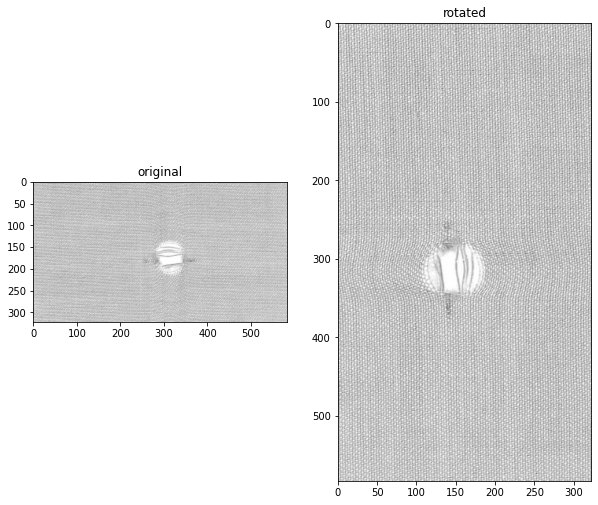

In [5]:
#rotate image


import os
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

folder_list = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/{}/".format(folder_list[4])
images_list = os.listdir(folder_path)
print(images_list)

degrees = 90
img = np.array(Image.open('{}/{}'.format(folder_path,img_nm)))
# img = img.sum(2) / (255*3) # converting to grayscale
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")
img0 = img.copy()
for _ in range(degrees // 90):
    img0 = img0.transpose(1, 0, 2)
    for j in range(0, img0.shape[1] // 2):
        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
        img0[: , img0.shape[1]-j-1, :] = c
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title("rotated")



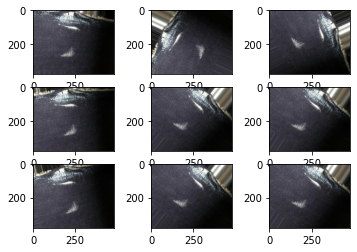

In [6]:
# python program to demonstrate the rotation shift of the image with the rotation_range argument

# we import all our required libraries
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


image = load_img('/content/gdrive/MyDrive/Textile_Project/Test_data/Bad selvage/img_6.jpg')
# we converting the image which is in PIL format into the numpy array, so that we can apply deep learning methods
dataImage = img_to_array(image)
# print(dataImage)
# expanding dimension of the load image
imageNew = expand_dims(dataImage, 0)
# now here below we creating the object of the data augmentation class
imageDataGen = ImageDataGenerator(rotation_range=90)
# because as we alreay load image into the memory, so we are using flow() function, to apply transformation
iterator = imageDataGen.flow(imageNew, batch_size=1)
# below we generate augmented images and plotting for visualization
for i in range(9):
	# we are below define the subplot
	pyplot.subplot(330 + 1 + i)
	# generating images of each batch
	batch = iterator.next()
	# again we convert back to the unsigned integers value of the image for viewing
	image = batch[0].astype('uint8')
	# we plot here raw pixel data
	pyplot.imshow(image)
# visualize the the figure
pyplot.show()

# **Padding Black Spaces**
To add black padding around an image, use the below code:

Text(0.5, 1.0, 'Padded')

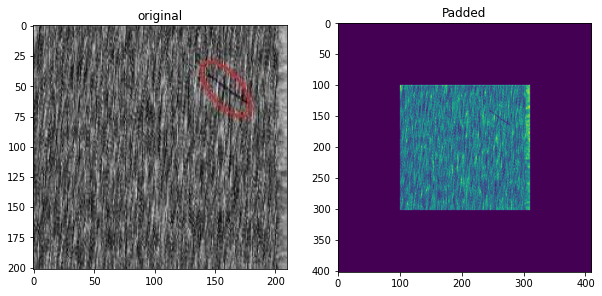

In [7]:
#Padding Black Spaces
import os
from PIL import Image

folder_list = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/{}/".format(folder_list[2])
images_list = os.listdir(folder_path)
img = np.array(Image.open('{}/{}'.format(folder_path,img_nm)))
# img = img.sum(2) / (255*3) # converting to grayscale
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")
img0 = img.copy()
for _ in range(degrees // 90):
    img0 = img0.transpose(1, 0, 2)
    for j in range(0, img0.shape[1] // 2):
        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
        img0[: , img0.shape[1]-j-1, :] = c
fig.add_subplot(1, 2, 2)
plt.imshow(img0)

img_grey = img.sum(2) / (255*3)
img0 = img_grey.copy()
img0 = np.pad(img0, ((100,100),(100,100)), mode='constant')
plt.imshow(img0)
plt.title("Padded")

In [9]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


# **Pixel Array**


*  Summarize shape of the pixel array 
*  Display the array of pixels as an image



uint8
(300, 400, 3)


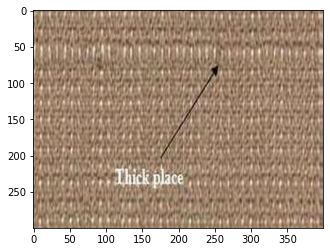

In [10]:
#PIXEL ARRAY

from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('/content/gdrive/MyDrive/Textile_Project/Train_data/A thick and thin place/img_1.jpg')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()


In [11]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('/content/gdrive/MyDrive/Textile_Project/Test_data/A thick and thin place/img_1.jpg')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

print(data)

<class 'numpy.ndarray'>
(169, 240, 3)
<class 'PIL.Image.Image'>
RGB
(240, 169)
[[[ 51  51  51]
  [142 142 142]
  [112 112 112]
  ...
  [222 222 222]
  [195 195 195]
  [197 197 197]]

 [[ 28  28  28]
  [ 37  37  37]
  [153 153 153]
  ...
  [213 213 213]
  [210 210 210]
  [158 158 158]]

 [[ 28  28  28]
  [  0   0   0]
  [ 68  68  68]
  ...
  [182 182 182]
  [220 220 220]
  [117 117 117]]

 ...

 [[182 182 182]
  [ 14  14  14]
  [  1   1   1]
  ...
  [182 182 182]
  [171 171 171]
  [168 168 168]]

 [[134 134 134]
  [  0   0   0]
  [ 10  10  10]
  ...
  [228 228 228]
  [185 185 185]
  [208 208 208]]

 [[ 75  75  75]
  [112 112 112]
  [ 49  49  49]
  ...
  [247 247 247]
  [164 164 164]
  [228 228 228]]]


In [12]:
print(data)

[[[ 51  51  51]
  [142 142 142]
  [112 112 112]
  ...
  [222 222 222]
  [195 195 195]
  [197 197 197]]

 [[ 28  28  28]
  [ 37  37  37]
  [153 153 153]
  ...
  [213 213 213]
  [210 210 210]
  [158 158 158]]

 [[ 28  28  28]
  [  0   0   0]
  [ 68  68  68]
  ...
  [182 182 182]
  [220 220 220]
  [117 117 117]]

 ...

 [[182 182 182]
  [ 14  14  14]
  [  1   1   1]
  ...
  [182 182 182]
  [171 171 171]
  [168 168 168]]

 [[134 134 134]
  [  0   0   0]
  [ 10  10  10]
  ...
  [228 228 228]
  [185 185 185]
  [208 208 208]]

 [[ 75  75  75]
  [112 112 112]
  [ 49  49  49]
  ...
  [247 247 247]
  [164 164 164]
  [228 228 228]]]


# **Negative of an Image**
Converting a color image to a negative image is very simple. You to perform only 3 steps for each pixel of the image


* First, get the RGB values of the pixel  
*  Calculate new RGB values using R = 255 – R, G = 255 – G, B = 255- B
* Finally, save the new RGB values in the pixel  

Text(0.5, 1.0, 'Negative of RGB image')

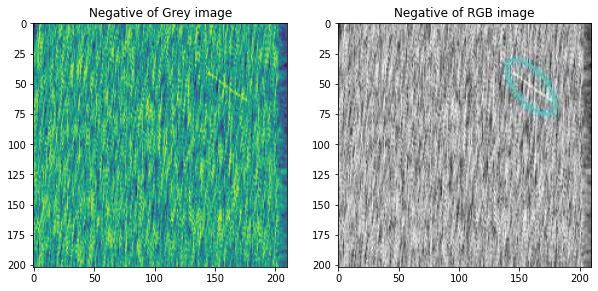

In [13]:
#NEGATIVE OF AN IMAGE

fig = plt.figure(figsize=(10, 10))
img_grey = 255*3 - img_grey        # 255 * 3 because we added along channel axis previously
fig.add_subplot(1, 2, 1)
plt.imshow(img_grey)
plt.title('Negative of Grey image')
img = 255 - img
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title('Negative of RGB image')

# **Visualizing RGB Channels**
To split the image into each RGB colors

['img_1.jpg', 'img_2.jpg', 'img_5.jpg', 'img_3.jpg', 'img_4.jpg', 'img_6.jpg', 'img_7.jpg', 'img_10(1).jpg', 'img_8.jpg', 'img_10.jpg', 'img_11.jpg', 'img_12.jpg']


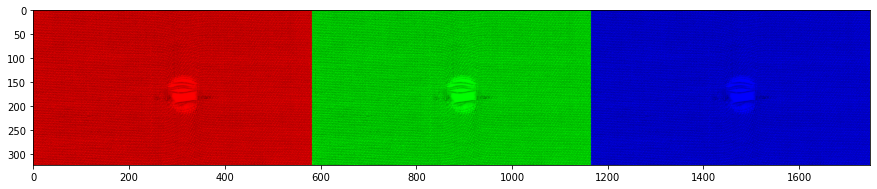

In [14]:
#VISUALIZING RGB CHANNELS

folder_list = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/{}/".format(folder_list[4])
images_list = os.listdir(folder_path)
print(images_list)
for img_nm in images_list:
  img = np.array(Image.open('{}/{}'.format(folder_path,img_nm)))
img_R, img_G, img_B = img.copy(), img.copy(), img.copy()
img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0
img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

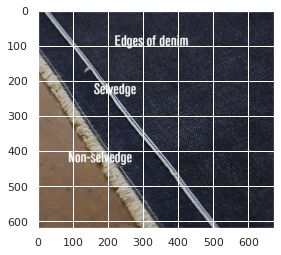

(620, 675, 3)

In [15]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
# Read the image
image = cv2.imread('/content/gdrive/MyDrive/Textile_Project/Train_data/Bad selvage/img_11.jpg') #--imread() helps in loading an image into jupyter including its pixel values
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()
image.shape

In [16]:
image[0][0]

array([66, 54, 50], dtype=uint8)

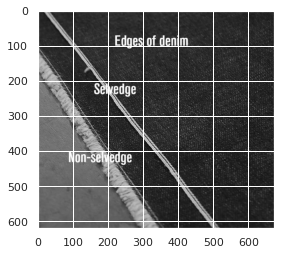

(620, 675)

In [17]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#print(“ Original Image: ”)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()
gray.shape

In [18]:
import numpy as np
data = np.array(gray)
flattened = data.flatten()
flattened.shape

(418500,)

In [19]:
flattened

array([54, 49, 44, ..., 32, 32, 32], dtype=uint8)

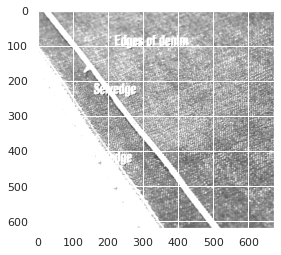

In [20]:
# 3x3 array for edge detection
mat_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
mat_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
  
filtered_image = cv2.filter2D(gray, -1, mat_y)
plt.imshow(filtered_image, cmap='gray')
filtered_image = cv2.filter2D(gray, -1, mat_x)
plt.imshow(filtered_image, cmap='gray')

# **Colour Reduction**
We can reduce the color intensity depends on our needs

['img_1.jpg', 'img_2.jpg', 'img_5.jpg', 'img_3.jpg', 'img_4.jpg', 'img_6.jpg', 'img_7.jpg', 'img_10(1).jpg', 'img_8.jpg', 'img_10.jpg', 'img_11.jpg', 'img_12.jpg']


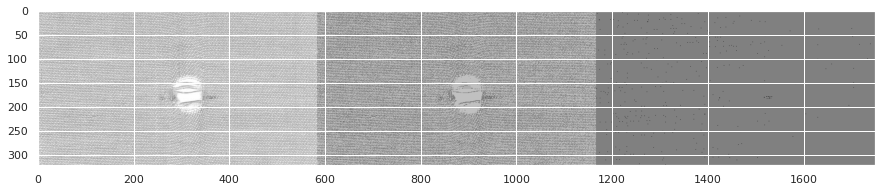

In [21]:
#COLOR REDUCTION 

folder_list = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/{}/".format(folder_list[4])
images_list = os.listdir(folder_path)
print(images_list)
for img_nm in images_list:
  img = np.array(Image.open('{}/{}'.format(folder_path,img_nm)))
# Making Pixel values discrete by first division by // which gives int and then multiply by the same factor
img_0 = (img // 64) * 64
img_1 = (img // 128) * 128
img_all = np.concatenate((img, img_0, img_1), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_all)

# **Trim Image**
We can trim an image in Numpy using Array Slicing

['img_1.jpg', 'img_2.jpg', 'img_3.jpg', 'img_4.jpg', 'img_5.jpg', 'img_6.jpg', 'img_7.jpg', 'img_8.jpg', 'img_9.jpg', 'img_10.jpg', 'img_11.jpg', 'img_12.jpg']


Text(0.5, 1.0, 'Trimmed')

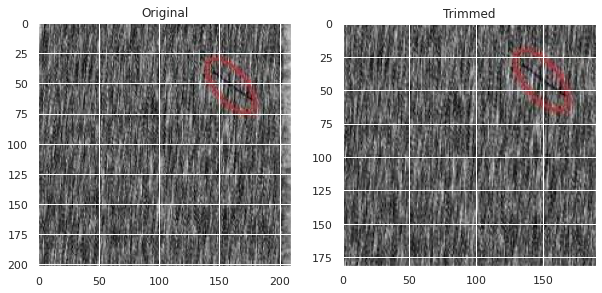

In [22]:
#TRIM IMAGE

folder_list = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/{}/".format(folder_list[2])
images_list = os.listdir(folder_path)
print(images_list)
for img_nm in images_list:
  img = np.array(Image.open('{}/{}'.format(folder_path,img_nm)))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
img0 = img[10:-10, 10:-10, :]
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Trimmed')

# **Binarize Image**
We can also binarize an Image using Numpy

['img_1.jpg', 'img_2.jpg', 'img_3.jpg', 'img_4.jpg', 'img_5.jpg', 'img_6.jpg', 'img_7.jpg', 'img_8.jpg', 'img_9.jpg', 'img_10.jpg', 'img_11.jpg', 'img_12.jpg']


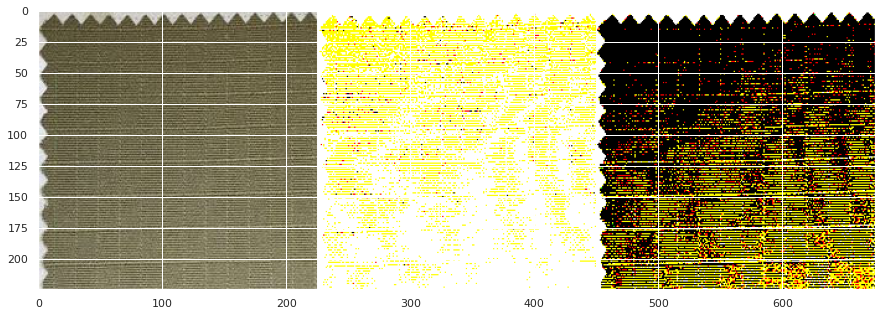

In [23]:
#BINARIZE IMAGE

folder_list = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/{}/".format(folder_list[1])
images_list = os.listdir(folder_path)
print(images_list)
for img_nm in images_list:
  img = np.array(Image.open('{}/{}'.format(folder_path,img_nm)))
img_64 = (img > 64) * 255
img_128 = (img > 128) * 255
fig = plt.figure(figsize=(15, 15))
img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)

# **Flip Image**


*   np.flipud() : [up/down]flips over x-axis     
*   np.fliplr() : [left/right]flips over y_axis   


    



['img_1.jpg', 'img_2.jpg', 'img_3.jpg', 'img_4.jpg', 'img_5.jpg', 'img_6.jpg', 'img_7.jpg', 'img_8.jpg', 'img_9.jpg', 'img_10.jpg', 'img_11.jpg', 'img_12.jpg']


Text(0.5, 1.0, 'Flip')

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

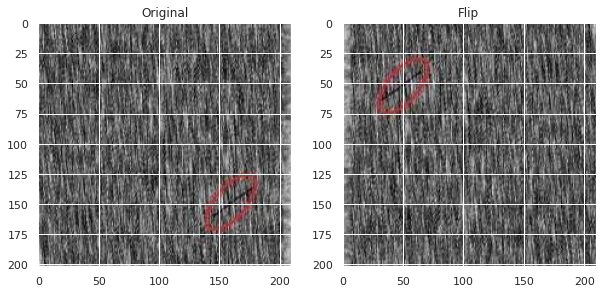

In [24]:
#FLIP IMAGE

folder_list = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/{}/".format(folder_list[2])
images_list = os.listdir(folder_path)
print(images_list)
for img_nm in images_list:
  img = np.array(Image.open('{}/{}'.format(folder_path,img_nm)))
  fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(np.flipud(img))
plt.title('Original')
fig.add_subplot(1, 2, 2)
plt.imshow(np.fliplr(img))
plt.title('Flip')

# **Blending Two Images**

['img_1.jpg', 'img_2.jpg', 'img_3.jpg', 'img_4.jpg', 'img_5.jpg', 'img_6.jpg', 'img_7.jpg', 'img_8.jpg', 'img_9.jpg', 'img_10.jpg', 'img_11.jpg', 'img_12.jpg']
uint8


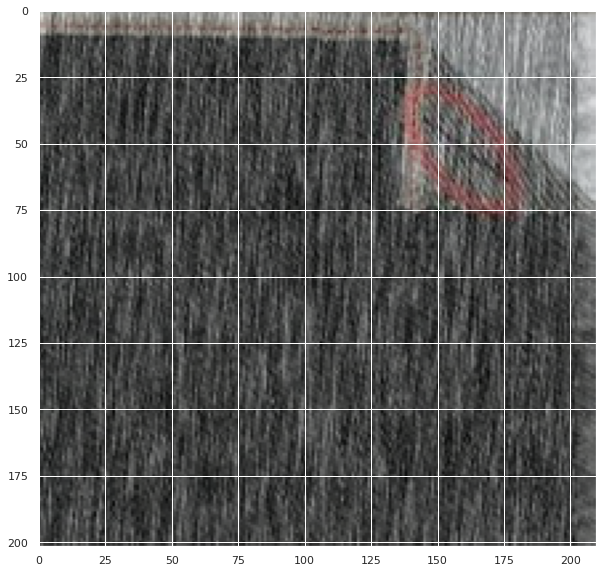

In [25]:
#BLENDING TWO IMAGES

folder_list = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/{}/".format(folder_list[2])
images_list = os.listdir(folder_path)
print(images_list)
for img_nm in images_list:
  img = np.array(Image.open('{}/{}'.format(folder_path,img_nm)))
img0 = np.array(Image.open('/content/gdrive/MyDrive/Textile_Project/Test_data/Bad selvage/img_5.jpg').resize(img.shape[1::-1])) # resize takes 2 arguments (WIDTH, HEIGHT)
print(img.dtype)
# uint8
dst = (img * 0.6 + img0 * 0.4).astype(np.uint8)   # Blending them in
plt.figure(figsize=(10, 10))
plt.imshow(dst)

# **Histogram For Pixel Intensity**

['img_2.jpg', 'img_1.jpg', 'img_3.jpg', 'img_4.jpg', 'img_5.jpg', 'img_6.jpg', 'img_7.jpg', 'img_8.jpg', 'img_9.jpg', 'img_10.jpg', 'img_11.jpg', 'img_12.jpg']


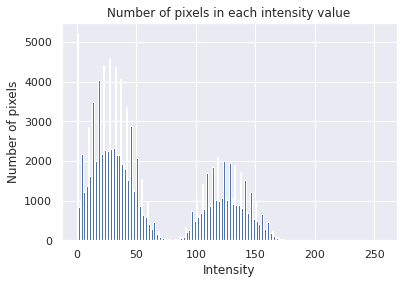

In [26]:
# HISTROGRAM

folder_list = [" A thick and thin place", "Bad selvage", "Ball", "Broken ends or warp", "Hole", "Oil spot"]
folder_path = "/content/gdrive/My Drive/Textile_Project/Test_data/{}/".format(folder_list[3])
images_list = os.listdir(folder_path)
print(images_list)
for img_nm in images_list:
  img = np.array(Image.open('{}/{}'.format(folder_path,img_nm)))
img_flat = img.flatten()
plt.hist(img_flat, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.show()